<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Object_Detection_Persian_Digit_Detection/blob/main/ALL_Final__BIG_CNN_classifier_between_image_of_text_vs_nontext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifier:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

from tensorflow.keras.utils import img_to_array


##Datas



###1st persian digit dataset: Handwritten Farsi Digit Dataset


In [ ]:
import requests, io
import numpy as np


url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Farsi_digits_X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Farsi_digits_Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

In [ ]:
X.shape

(102352, 32, 32)

In [ ]:
im_h=X.shape[1]
im_w=X.shape[2]

###2nd Persian digits:Mine Digit dataset, I created them using plt:

In [ ]:
# make a np array from mine dataset:
dj_img=[]
dj_label=[]
path='/content/drive/MyDrive/MachineLearning/ghabl/s_croped_png'
for img in os.listdir(path):
  img_p=os.path.join(path,img)
  image=cv2.imread(img_p)
  #some preprocessing commands:
  res=cv2.resize(image,(im_h,im_w))
  res=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
  res=img_to_array(res)
  dj_img.append(res)
  label=1
  dj_label.append(label)

dj_label=np.array(dj_label)
dj_img=np.array(dj_img,dtype='float')/255.0

In [ ]:
X.shape

(102352, 32, 32)

In [ ]:
dj_img.shape

(1600, 32, 32, 1)

In [ ]:
X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
X.shape

(102352, 32, 32, 1)

### Concatenating the digit datasets: I merge mine data np-array to X,Y np-array 

In [ ]:
X=np.concatenate((X, dj_img))

In [ ]:
Y1=np.ones(X.shape[0],dtype='int')

In [ ]:
X.shape

(103952, 32, 32, 1)




###1st Non digits dataset: we get the dataset of nontext images from here:

In [ ]:
!wget https://github.com/iilabau/AUTNTdataset/archive/refs/heads/master.zip

--2021-11-02 06:52:32--  https://github.com/iilabau/AUTNTdataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/iilabau/AUTNTdataset/zip/refs/heads/master [following]
--2021-11-02 06:52:32--  https://codeload.github.com/iilabau/AUTNTdataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [      <=>           ] 468.98M  34.1MB/s    in 15s     

2021-11-02 06:52:47 (31.6 MB/s) - ‘master.zip’ saved [491759993]



In [ ]:
!unzip /content/master.zip

In [ ]:
!cp /content/AUTNTdataset-master/Training/Non-text -r '/content/drive/MyDrive/MachineLearning/tx vs Ntx'

In [ ]:
nTX_list=os.listdir('/content/drive/MyDrive/MachineLearning/tx_vs_Ntx/Non-text')

###2nd Non digits dataset: we get the dataset of nontext images from here:Dataset-2 link:
https://github.com/Vishwesh4/Text-vs-Non-Text-Classifier

In [ ]:
!git clone https://github.com/Vishwesh4/Text-vs-Non-Text-Classifier.git

Cloning into 'Text-vs-Non-Text-Classifier'...
remote: Enumerating objects: 437, done.
remote: Total 437 (delta 0), reused 0 (delta 0), pack-reused 437
Receiving objects: 100% (437/437), 2.06 MiB | 12.91 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
!cp /content/Text-vs-Non-Text-Classifier/text_nontext-dataset/nontext -r '/content/drive/MyDrive/MachineLearning/tx vs Ntx'

###3rd Non digits dataset: we get the dataset of persian text as non digits images from here:
Dataset:
http://ebrahimpourlab.ir/download-dataset-sruphn/


In [ ]:
# !pip install unrar
!unrar x /content/dataset-SRU-PHN.rar

In [ ]:
!cp /content/data/bmp -r '/content/drive/MyDrive/MachineLearing/tx_vs_Ntx'

###4th Non digits dataset: we get the dataset of persian text as non digits images from here:
Dataset Shotor:https://www.kaggle.com/amir137825/persianocrdataset/version/1?select=Shotor_Words.csv

In [ ]:
!kaggle datasets download -d amir137825/persianocrdataset

 93% 81.0M/87.4M [00:00<00:00, 80.2MB/s]
100% 87.4M/87.4M [00:00<00:00, 94.7MB/s]


In [ ]:
!unzip /content/persianocrdataset.zip

In [ ]:
len(os.listdir('/content/Shotor_Images/Shotor_Images'))

120000

In [ ]:
!cp /content/Shotor_Images/Shotor_Images -r '/content/drive/MyDrive/MachineLearing/tx_vs_Ntx'

### I copy all non-digits images to one folder:

In [ ]:
import shutil

In [ ]:
# copy ntxt dataset1 to ntx folder:
for file1 in os.listdir('/content/drive/MyDrive/MachineLearning/tx_vs_Ntx/nontext'):
  src=os.path.join('/content/drive/MyDrive/MachineLearning/tx_vs_Ntx/nontext',file1)
  dst='/content/drive/MyDrive/MachineLearning/tx_vs_Ntx/ntx2'
  shutil.copy(src,dst)

In [ ]:
len(os.listdir(dst))

177

In [ ]:
# copy ntxt dataset2 to ntx folder:
for file1 in os.listdir('/content/drive/MyDrive/MachineLearning/tx_vs_Ntx/Non-text'):
  src=os.path.join('/content/drive/MyDrive/MachineLearning/tx_vs_Ntx/Non-text',file1)
  dst='/content/drive/MyDrive/MachineLearning/tx_vs_Ntx/ntx2'
  shutil.copy(src,dst)

In [ ]:
len(os.listdir(dst))

2482

In [ ]:
for file1 in os.listdir('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/bmp'):
  src=os.path.join('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/bmp',file1)
  dst='/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/ntx2'
  shutil.copy(src,dst)

In [ ]:
len(os.listdir(dst))

25007

In [ ]:
for file1 in os.listdir('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/Shotor_Images'):
  src=os.path.join('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/Shotor_Images',file1)
  dst='/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/ntx2'
  shutil.copy(src,dst)

In [ ]:
len(os.listdir(dst))

145007

We copy all images to local space of google colab to increase the speed:

In [ ]:
! cp /content/drive/MyDrive/MachineLearing/tx_vs_Ntx/ntx2 -r '/content/sample_data'

✨ I read all non-digits images and make a np-array from them, and I also prepare the labels np-array:

In [ ]:
# path='/content/drive/MyDrive/MachineLearning/tx_vs_Ntx/ntx'
path='/content/sample_data/ntx2'
ntx_img=[]
labels=[]
for img in os.listdir(path):
  img_p=os.path.join(path,img)
  image=cv2.imread(img_p)
  #some preprocessing commands:
  res=cv2.resize(image,(im_h,im_w))
  res=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
  res=img_to_array(res)
  ntx_img.append(res)
  label=0
  labels.append(label)

labels=np.array(labels)
ntx_img=np.array(ntx_img,dtype='float')/255.0



###Merging txt and ntxt datasets:

In [ ]:
# now I merge digit numpy-array to nontxt numpy-array:

Dataset: https://www.kaggle.com/amir137825/persianocrdataset

In [ ]:
kaggle datasets download -d amir137825/persianocrdataset

In [ ]:
# Y.shape

(102352,)

In [ ]:
# Y1=np.ones(Y.shape[0],dtype='int')

In [ ]:
# Y1

In [ ]:
X.shape

(103952, 32, 32, 1)

In [ ]:
# X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)

In [ ]:
# X.shape

(102352, 32, 32, 1)

In [ ]:
ntx_img.shape

(145007, 32, 32, 1)

✨ I save np-arrays of digits and non-digits for later use:

In [ ]:
np.savez_compressed('/content/drive/MyDrive/MachineLearning/Text_nparray',X)
np.savez_compressed('/content/drive/MyDrive/MachineLearning/Non_Text_nparray',ntx_img)

In [ ]:
np.savez_compressed('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/Text_nparray',X)
np.savez_compressed('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/Non_Text_nparray',ntx_img)

In [ ]:
x=np.concatenate((X, ntx_img))

In [ ]:
x.shape

(248959, 32, 32, 1)

In [ ]:
y=np.concatenate((Y1,labels))
y.shape

(248959,)

In [ ]:
from sklearn.utils import shuffle
x, y = shuffle(x,y, random_state = 0 )

✨ I save np-arrays of images and labels for later use:

In [ ]:
np.savez_compressed('/content/drive/MyDrive/MachineLearning/x_tx_ntx_nparay',x)
np.savez_compressed('/content/drive/MyDrive/MachineLearning/y_tx_ntx_nparay',y)

In [ ]:
np.savez_compressed('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/x_tx_ntx_nparay',x)
np.savez_compressed('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/y_tx_ntx_nparay',y)


##Binery classsifier Model:

In [ ]:
!cp /content/x_tx_ntx_nparay.npz -r '/content/drive/MyDrive/MachineLearing/tx_vs_Ntx'

cp: cannot stat '/content/x_tx_ntx_nparay.npz': No such file or directory


✨ I read np-arrays of images and labels: 

In [3]:
x=np.load('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/x_tx_ntx_nparay.npz')
y=np.load('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/y_tx_ntx_nparay.npz')

In [4]:
x = x.f.arr_0
y=y.f.arr_0

In [5]:
x.shape

(248959, 32, 32, 1)

In [6]:
y.shape

(248959,)


###Prepairing the train and test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.2, random_state=42, shuffle=True)



###Prepairing the model

In [9]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 

In [10]:
x.shape

(248959, 32, 32, 1)

In [11]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(x.shape[1],x.shape[2],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [14]:
model_hist=model.fit(x_train,y_train,epochs=10,validation_split=.2,batch_size=128)

Epoch 1/10
1245/1245 [==============================] - 177s 141ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0035 - val_accuracy: 0.9988
Epoch 2/10
1245/1245 [==============================] - 174s 140ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 3/10
1245/1245 [==============================] - 174s 140ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 8.1326e-04 - val_accuracy: 0.9998
Epoch 4/10
1245/1245 [==============================] - 175s 141ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 9.7385e-04 - val_accuracy: 0.9996
Epoch 5/10
1245/1245 [==============================] - 174s 140ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 9.7939e-04 - val_accuracy: 0.9996
Epoch 6/10
1245/1245 [==============================] - 174s 140ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9996
Epoch 7/10
1245/1245 [==============================] - 175s 140ms/step - loss: 0.0012 - accuracy: 0

In [15]:
yp=model.predict(x_test)


In [ ]:
yp=yp.reshape(-1)

In [17]:
yp=np.array(yp,dtype='int')

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(yp,y_test)

0.9968870501285347

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp,normalize='true')

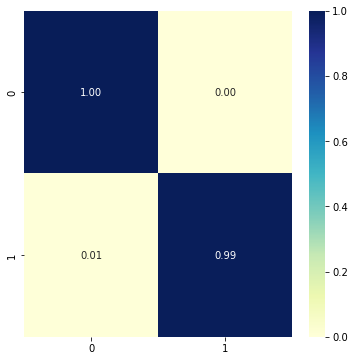

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=[6,6])
sn.heatmap(cm, annot=True, fmt='.2f', cmap='YlGnBu')



###Accuracy and loss visualization 

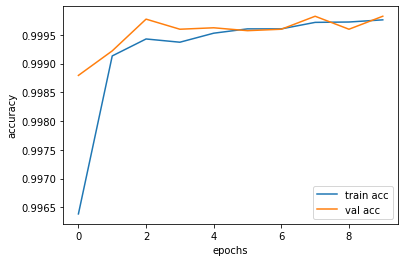

In [22]:
plt.plot(model_hist.history['accuracy'],label='train acc')
plt.plot(model_hist.history['val_accuracy'],label='val acc')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show();

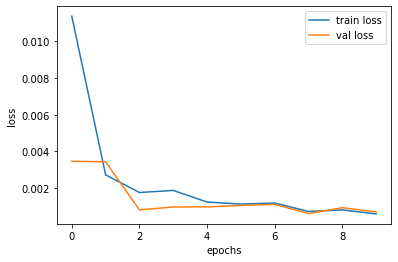

In [23]:
plt.plot(model_hist.history['loss'],label='train loss')
plt.plot(model_hist.history['val_loss'],label='val loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();



###Save and Load Model:

In [24]:
model_path='/content/drive/MyDrive/MachineLearning/tx_vs_ntx_clf_big_128_3'
model.save(model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/tx_vs_ntx_clf_big_128_3/assets


In [25]:
model.save('/content/drive/MyDrive/MachineLearing/tx_vs_Ntx/tx_vs_ntx_clf_big_128_3')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearing/tx_vs_Ntx/tx_vs_ntx_clf_big_128_3/assets


In [ ]:
# from keras.models import load_model

In [ ]:
# model_path='/content/drive/MyDrive/MachineLearning/tx_vs_ntx_clf_big_3'
# model=load_model(model_path)

In [26]:
from google.colab import files

In [32]:
!cp /content/drive/MyDrive/MachineLearning/tx_vs_ntx_clf_big_128_3 -r '/content'

In [33]:
! zip -r /content/tx_vs_ntx_clf_batch128_3.zip  /content/tx_vs_ntx_clf_big_128_3

  adding: content/tx_vs_ntx_clf_big_128_3/ (stored 0%)
  adding: content/tx_vs_ntx_clf_big_128_3/variables/ (stored 0%)
  adding: content/tx_vs_ntx_clf_big_128_3/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/tx_vs_ntx_clf_big_128_3/variables/variables.index (deflated 67%)
  adding: content/tx_vs_ntx_clf_big_128_3/assets/ (stored 0%)
  adding: content/tx_vs_ntx_clf_big_128_3/keras_metadata.pb (deflated 91%)
  adding: content/tx_vs_ntx_clf_big_128_3/saved_model.pb (deflated 88%)


In [34]:
files.download('/content/tx_vs_ntx_clf_batch128_3.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Example Test Image:

In [35]:
def dg_rec(path, model_path): 
  from keras.models import load_model
  model=load_model(model_path) 
  import cv2
  import matplotlib.pyplot as plt
  import numpy as np
  from skimage import filters
  from skimage.filters import threshold_otsu#, sobel
  from skimage.segmentation import clear_border
  from skimage.measure import label, regionprops
  from skimage.morphology import closing, square
  from skimage.color import label2rgb
  from tensorflow.keras.utils import img_to_array
  
  img=cv2.imread(path)
  image=cv2.imread(path)

  img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  blur = cv2.GaussianBlur(gray, (7,7), 1)

  thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,87,9)
  edge_sobel = filters.sobel(thresh)


  thresh = threshold_otsu(edge_sobel)
  bw = closing(edge_sobel > thresh, square(3))

  cleared=clear_border(bw)

  label_image=label(cleared)

  image_label_overlay = label2rgb(label_image, image=image, bg_label=0)
  image_boxs=[]
  image_slices=[]
  for region in regionprops(label_image):
      # take regions with large enough areas
      if region.area >= 100:
          # draw rectangle around segmented 
          minr, minc, maxr, maxc = region.bbox
          image_boxs.append([minc,minr, maxc,maxr])
          img=image[minr:maxr, minc:maxc]
          img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          image_slices.append(img)
  x_img=[]
  for image in image_slices:
    
    #some preprocessing commands:
    image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,87,9)
    image=cv2.resize(image,(32,32), interpolation=cv2.INTER_AREA)
    
    image=img_to_array(image)
    x_img.append(image)
    


  x_img=np.array(x_img,dtype='float')/255.0
  labels=model.predict(x_img)
  labels=labels.reshape(-1)
  labels=np.array(labels)
  dig_l=np.where(labels > .5, 1,0)

  input_image_path=path
  image=cv2.imread(input_image_path)
  orig=image

  i=0

  for img in x_img:
  
    if dig_l[i]==1:
      
      startX = image_boxs[i][0]
      startY = image_boxs[i][1]
      endX = image_boxs[i][2]
      endY = image_boxs[i][3]
      cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 3)
    i += 1

  
  fig , ax=plt.subplots(nrows=1,ncols=2,figsize=(13,26))
  ax[0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
  i=0

  for img in x_img:
  
    startX = image_boxs[i][0]
    startY = image_boxs[i][1]
    endX = image_boxs[i][2]
    endY = image_boxs[i][3]
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 3)
    i += 1

  ax[1].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))

  
  ax[0].set_title('Only Persian Digit Objects')
  ax[1].set_title('All Detected Objects')
  ax[0].axis('off')
  ax[1].axis('off')

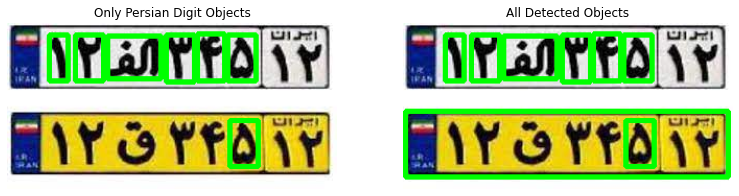

In [42]:
path1='/content/download.jpg'
model_path1='/content/tx_vs_ntx_clf_big_128_3'
dg_rec(path1, model_path1)

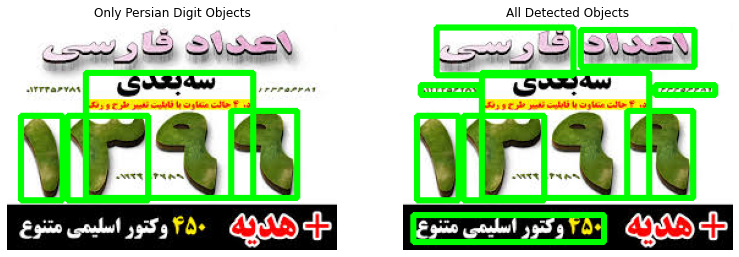

In [43]:
path1='/content/images.jpg'
model_path1='/content/tx_vs_ntx_clf_big_128_3'
dg_rec(path1, model_path1)

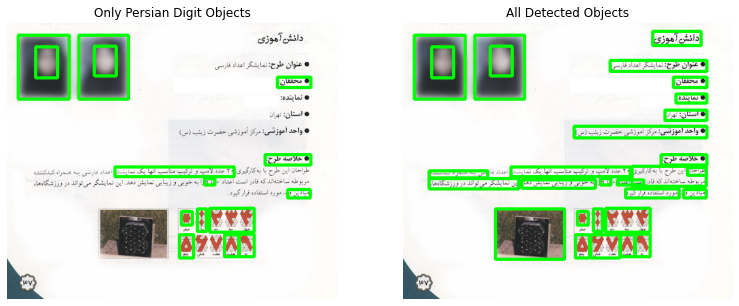

In [49]:
path1='/content/unnamed (2).jpg'
model_path1='/content/tx_vs_ntx_clf_big_128_3'
dg_rec(path1, model_path1)